In [1]:
%load_ext autoreload
%autoreload 2

# Download dataset to GDrive (Opt)

In [2]:
t12_url = "https://isic-archive.s3.amazonaws.com/challenges/2018/ISIC2018_Task1-2_Training_Input.zip"
t3_url = "https://isic-archive.s3.amazonaws.com/challenges/2018/ISIC2018_Task3_Training_Input.zip"
t12_name = t12_url.split("/")[-1]
t3_name = t3_url.split("/")[-1]

In [3]:
!wget $t12_url
!wget $t3_url
!unzip $t12_name
!unzip $t3_name

--2025-10-12 06:17:35--  https://isic-archive.s3.amazonaws.com/challenges/2018/ISIC2018_Task1-2_Training_Input.zip
Resolving isic-archive.s3.amazonaws.com (isic-archive.s3.amazonaws.com)... 54.231.164.153, 54.231.200.33, 54.231.233.73, ...
Connecting to isic-archive.s3.amazonaws.com (isic-archive.s3.amazonaws.com)|54.231.164.153|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 11165358566 (10G) [application/zip]
Saving to: ‘ISIC2018_Task1-2_Training_Input.zip’

ISIC2018_Task1-2_Tr 100%[===================>]  10.40G  63.7MB/s    in 2m 42s  

2025-10-12 06:20:18 (65.6 MB/s) - ‘ISIC2018_Task1-2_Training_Input.zip’ saved [11165358566/11165358566]

--2025-10-12 06:20:18--  https://isic-archive.s3.amazonaws.com/challenges/2018/ISIC2018_Task3_Training_Input.zip
Resolving isic-archive.s3.amazonaws.com (isic-archive.s3.amazonaws.com)... 3.5.9.171, 3.5.27.82, 16.15.193.105, ...
Connecting to isic-archive.s3.amazonaws.com (isic-archive.s3.amazonaws.com)|3.5.9.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2771732744 (2.6G) [application/zip]
Saving to: ‘ISIC2018_Task3_Training_Input.zip’

ISIC2018_Task3_Trai 100%[===================>]   2.58G  27.4MB/s    in 50s     

2025-10-12 06:21:09 (52.3 MB/s) - ‘ISIC2018_Task3_Training_Input.zip’ saved [2771732744/2771732744]

Archive:  ISIC2018_Task1-2_Training_Input.zip
   creating:

In [ ]:
from google.colab import drive
import shutil
import os

drive.mount('/content/drive')

source_folder_t12 = "/content/ISIC2018_Task1-2_Training_Input"
source_folder_t3 = "/content/ISIC2018_Task3_Training_Input"
destination_folder = "/content/drive/My Drive/PPT_Test/"

# Create destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Function to move files
def move_files(source, destination):
    if os.path.exists(source):
        for item in os.listdir(source):
            s = os.path.join(source, item)
            d = os.path.join(destination, item)
            if not os.path.exists(d):
                shutil.move(s, d)
                print(f"Moved: {s} to {d}")
            else:
                print(f"Skipped: {s} as {d} already exists")
    else:
        print(f"Source folder not found: {source}")

move_files(source_folder_t12, destination_folder)
move_files(source_folder_t3, destination_folder)

Streaming output truncated to the last 5000 lines.
Moved: /content/ISIC2018_Task3_Training_Input/ISIC_0027392.jpg to /content/drive/My Drive/PPT_Test/ISIC_0027392.jpg
Moved: /content/ISIC2018_Task3_Training_Input/ISIC_0024473.jpg to /content/drive/My Drive/PPT_Test/ISIC_0024473.jpg
Moved: /content/ISIC2018_Task3_Training_Input/ISIC_0033727.jpg to /content/drive/My Drive/PPT_Test/ISIC_0033727.jpg
Moved: /content/ISIC2018_Task3_Training_Input/ISIC_0031347.jpg to /content/drive/My Drive/PPT_Test/ISIC_0031347.jpg
Moved: /content/ISIC2018_Task3_Training_Input/ISIC_0029171.jpg to /content/drive/My Drive/PPT_Test/ISIC_0029171.jpg
Moved: /content/ISIC2018_Task3_Training_Input/ISIC_0026468.jpg to /content/drive/My Drive/PPT_Test/ISIC_0026468.jpg
Moved: /content/ISIC2018_Task3_Training_Input/ISIC_0030363.jpg to /content/drive/My Drive/PPT_Test/ISIC_0030363.jpg
Moved: /content/ISIC2018_Task3_Training_Input/ISIC_0032835.jpg to /content/drive/My Drive/PPT_Test/ISIC_0032835.jpg
Moved: /content/ISIC2

# Basic Imports

In [3]:
import os
import pandas as pd
import glob
import numpy as np
import warnings
import matplotlib.pyplot as plt
from PIL import Image

# from google.colab import drive
import shutil

# Data Loading

In [4]:
# drive.mount('/content/drive')

base_folder = "/data/wilsontansil/seeing-is-believing/notebooks/ISIC2018_Task3_Training_Input"
files = os.listdir(base_folder)

In [5]:
csv_file = None
for root, dirs, files in os.walk(base_folder):
    for file in files:
        if file.endswith(".csv"):
            csv_file = os.path.join(root, file)
            break
    if csv_file:
        break

if csv_file:
    print(f"Found CSV file: {csv_file}")
    df = pd.read_csv(csv_file)
    display(df.head())
else:
    print("Cannot load data as no CSV file was found.")

Found CSV file: /data/wilsontansil/seeing-is-believing/notebooks/ISIC2018_Task3_Training_Input/cleaned_data.csv


image label
0  ISIC_0024310   MEL
1  ISIC_0024313   MEL
2  ISIC_0024315   MEL
3  ISIC_0024323   MEL
4  ISIC_0024333   MEL

# Basic Statistics

## Dataset Statistics

In [ ]:
# long_df = df.melt(id_vars=['image'], value_vars=['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'])
# long_df = long_df[long_df['value'] == 1].drop('value', axis=1)
# long_df = long_df.rename(columns={'variable': 'label'})


# Display basic dataset statistics
print("\nDataset Statistics:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Count valid images (assuming a valid image has a label)
valid_images_count = long_df.shape[0]
print(f"Number of valid images with assigned labels: {valid_images_count}")

# Display unique labels and their counts
print("\nLabel Distribution:")
display(long_df['label'].value_counts())

# Display the number of unique images
print(f"\nNumber of unique images: {long_df['image'].nunique()}")


Dataset Statistics:
Number of rows: 10015
Number of columns: 8
Number of valid images with assigned labels: 10015

Label Distribution:


label
NV       6705
MEL      1113
BKL      1099
BCC       514
AKIEC     327
VASC      142
DF        115
Name: count, dtype: int64


Number of unique images: 10015


## Pixel Intensity

In [ ]:
avg_red_intensities = []
avg_green_intensities = []
avg_blue_intensities = []

for index, row in long_df.iterrows():
    image_filename = row['image']
    image_path = os.path.join(base_folder, image_filename + '.jpg')

    try:
        img = Image.open(image_path).convert('RGB')
        img_np = np.array(img)

        avg_red_intensities.append(np.mean(img_np[:, :, 0]))
        avg_green_intensities.append(np.mean(img_np[:, :, 1]))
        avg_blue_intensities.append(np.mean(img_np[:, :, 2]))

        img.close()
    except FileNotFoundError:
        print(f"Warning: Image file not found at {image_path}. Skipping.")
    except Exception as e:
        print(f"Warning: Could not process image file {image_path}: {e}. Skipping.")

mean_red = np.mean(avg_red_intensities)
std_red = np.std(avg_red_intensities)

mean_green = np.mean(avg_green_intensities)
std_green = np.std(avg_green_intensities)

mean_blue = np.mean(avg_blue_intensities)
std_blue = np.std(avg_blue_intensities)

print(f"Mean Red Channel Intensity: {mean_red:.2f}, Standard Deviation: {std_red:.2f}")
print(f"Mean Green Channel Intensity: {mean_green:.2f}, Standard Deviation: {std_green:.2f}")
print(f"Mean Blue Channel Intensity: {mean_blue:.2f}, Standard Deviation: {std_blue:.2f}")

Mean Red Channel Intensity: 194.70, Standard Deviation: 25.06
Mean Green Channel Intensity: 139.26, Standard Deviation: 21.86
Mean Blue Channel Intensity: 145.49, Standard Deviation: 24.24


# Basic Visualizations

Sampled filename matrix (rows = classes):


col1          col2          col3          col4          col5
MEL    ISIC_0033299  ISIC_0025439  ISIC_0034034  ISIC_0032624  ISIC_0027622
NV     ISIC_0026036  ISIC_0032606  ISIC_0024680  ISIC_0032711  ISIC_0028432
BCC    ISIC_0029951  ISIC_0034026  ISIC_0032384  ISIC_0027371  ISIC_0034058
AKIEC  ISIC_0030375  ISIC_0027231  ISIC_0030826  ISIC_0024522  ISIC_0026709
BKL    ISIC_0029217  ISIC_0033716  ISIC_0028451  ISIC_0029613  ISIC_0028120
DF     ISIC_0031309  ISIC_0024553  ISIC_0027648  ISIC_0030427  ISIC_0025302
VASC   ISIC_0033565  ISIC_0025599  ISIC_0030882  ISIC_0031719  ISIC_0028146

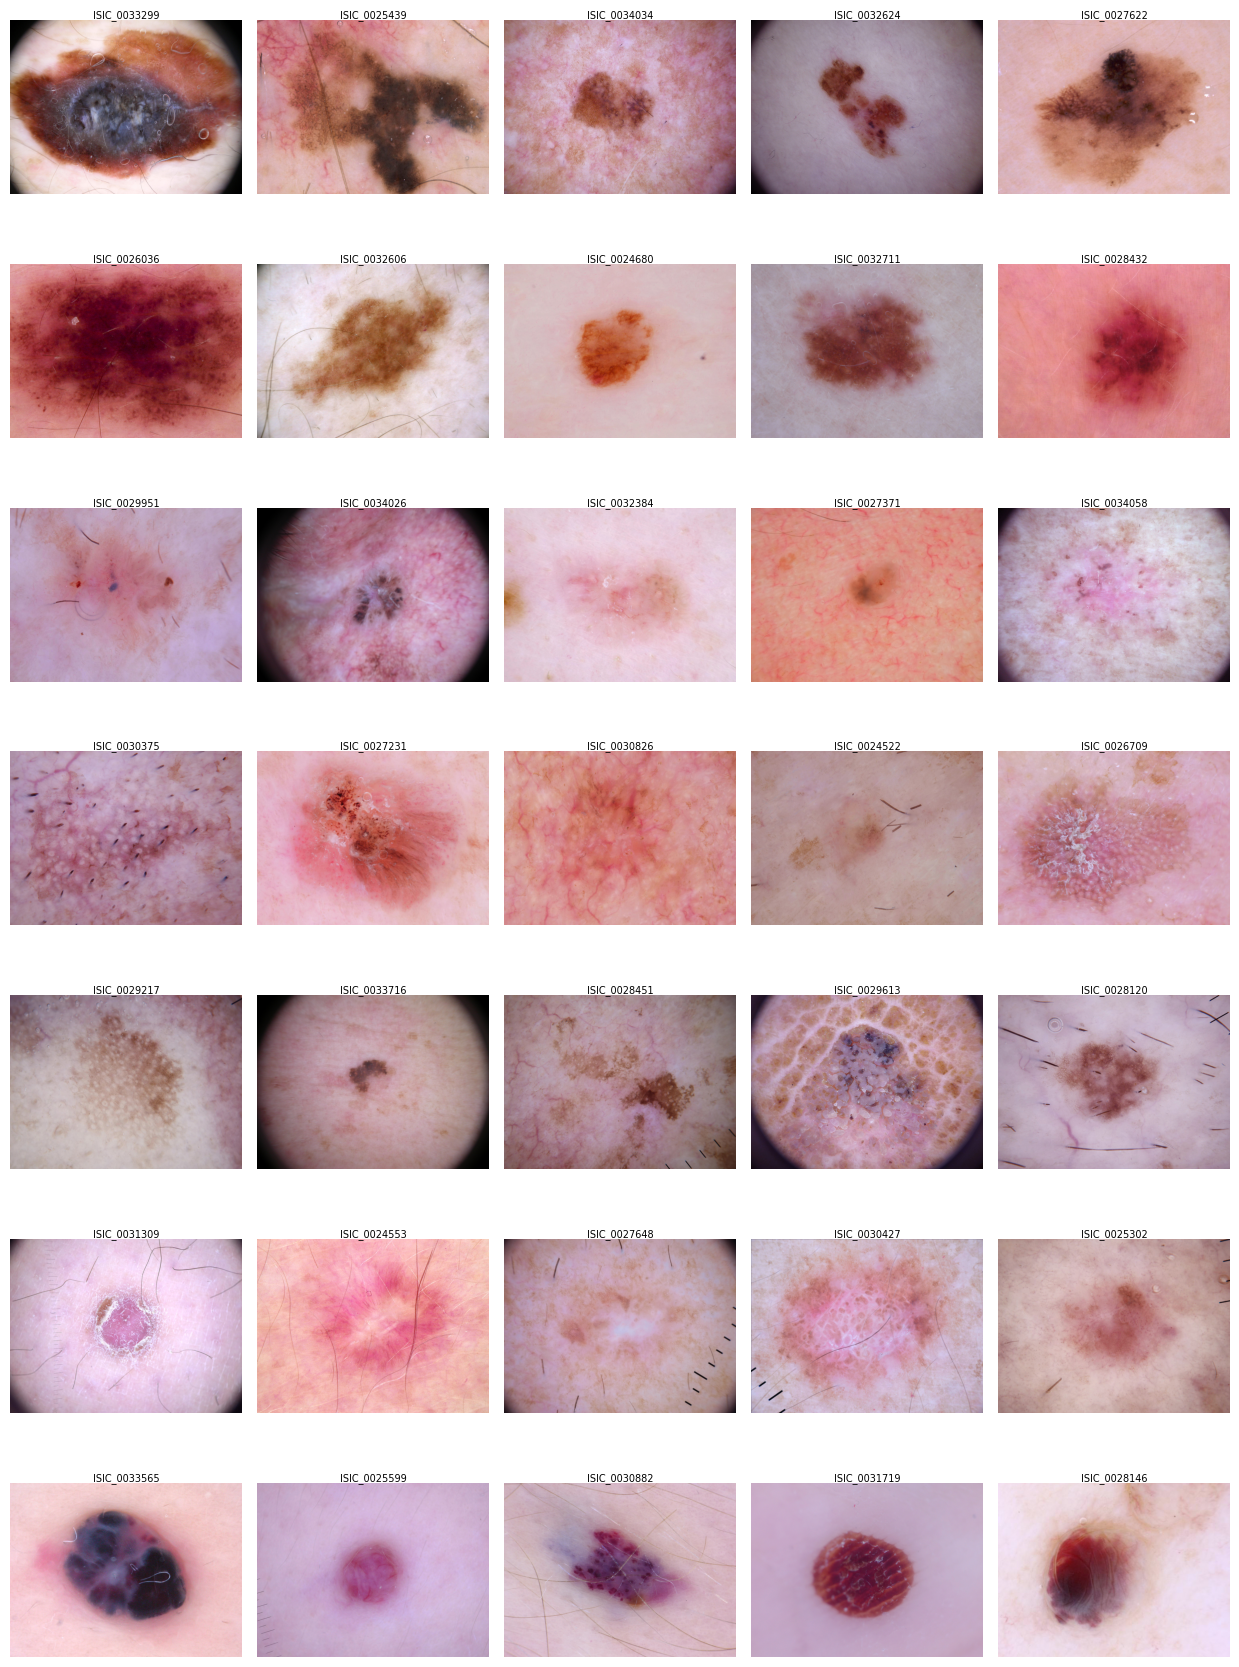

In [ ]:
def sample_and_render_grid(
    df,
    class_cols = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC'],
    image_col = 'image',
    n_per_class = 5,
    base_path = '',         # folder prefix for images; leave '' if image column contains full paths
    ext_fallback = None,    # e.g. '.jpg' or None to not append
    random_state = 42,
    figsize_per_image = (2.5, 2.5)
):
    """
    Returns:
      - matrix (list of lists) of sampled filenames (shape: len(class_cols) x n_per_class)
      - displays the filename matrix and the rendered image grid
    Notes:
      - If a class has fewer than n_per_class samples, sampling uses replace=True.
      - If an image file is missing, a gray placeholder is shown and a warning is emitted.
    """
    # 1) sample filenames per class
    sampled = {}
    for cls in class_cols:
        if cls not in df.columns:
            raise ValueError(f"Class column '{cls}' not found in dataframe.")
        choices = df.loc[df[cls] == 1, image_col].dropna()
        replace = len(choices) < n_per_class
        if len(choices) == 0:
            warnings.warn(f"No images found for class '{cls}'. Filling with empty strings.")
            sampled_list = [''] * n_per_class
        else:
            sampled_list = choices.sample(n=n_per_class, replace=replace, random_state=random_state).tolist()
        sampled[cls] = sampled_list

    # 2) build matrix (rows=classes, cols=samples)
    matrix = [sampled[cls] for cls in class_cols]
    matrix_df = pd.DataFrame(matrix, index=class_cols, columns=[f'col{i+1}' for i in range(n_per_class)])

    # print/display filename matrix
    print("Sampled filename matrix (rows = classes):")
    display(matrix_df)   # in notebook; if not available, use print(matrix_df)

    # 3) render images in a grid
    rows = len(class_cols)
    cols = n_per_class
    fig_w = cols * figsize_per_image[0]
    fig_h = rows * figsize_per_image[1]
    fig, axes = plt.subplots(rows, cols, figsize=(fig_w, fig_h))

    # If axes is 1D when rows==1 or cols==1, normalize indexing
    if rows == 1:
        axes = axes[np.newaxis, :]
    if cols == 1:
        axes = axes[:, np.newaxis]

    for i, cls in enumerate(class_cols):
        for j in range(cols):
            ax = axes[i, j]
            fname = matrix[i][j]
            # determine path to file
            if not fname:
                img = Image.new('RGB', (224, 224), (200, 200, 200))
            else:
                candidate = os.path.join(base_path, fname) if base_path else fname
                # if not exist and ext_fallback provided, try appending ext
                if not os.path.exists(candidate) and ext_fallback:
                    candidate_with_ext = candidate + ext_fallback
                    if os.path.exists(candidate_with_ext):
                        candidate = candidate_with_ext
                if os.path.exists(candidate):
                    try:
                        img = Image.open(candidate).convert('RGB')
                    except Exception as e:
                        warnings.warn(f"Failed to open image '{candidate}': {e}")
                        img = Image.new('RGB', (224, 224), (200, 200, 200))
                else:
                    warnings.warn(f"Image not found: '{candidate}'")
                    img = Image.new('RGB', (224, 224), (200, 200, 200))

            ax.imshow(img)
            ax.axis('off')
            # put filename as small caption (optional)
            if j == 0:
                # show class name on leftmost column as ylabel-like text
                ax.set_ylabel(cls, rotation=0, labelpad=50, va='center', fontsize=10)
            # optionally, place filename as title (shortened)
            short_name = os.path.basename(fname) if fname else ''
            ax.set_title(short_name, fontsize=7, pad=2)

    plt.tight_layout()
    plt.show()

    return matrix_df, matrix

matrix_df, matrix = sample_and_render_grid(df, base_path=base_folder, ext_fallback='.jpg')


## Class Distribution Visualization


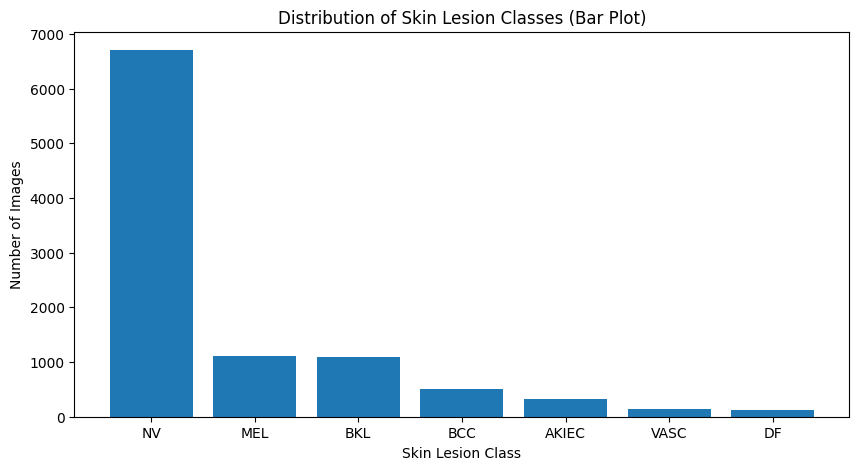

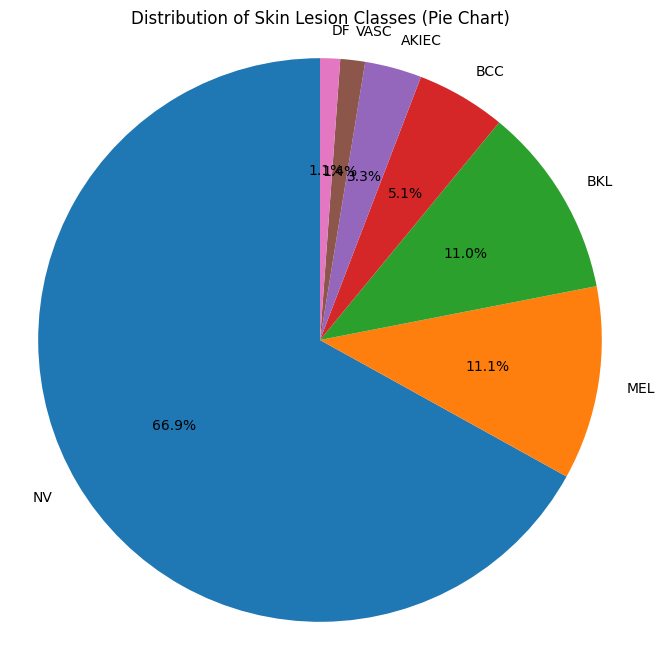

In [ ]:
class_counts = long_df['label'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Skin Lesion Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Skin Lesion Classes (Bar Plot)')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Skin Lesion Classes (Pie Chart)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Terdapat ketidakseimbangan data dimana NV memiliki porsi 66.9%

## Image Dimensions Visualization


In [ ]:
image_widths = []
image_heights = []

for index, row in long_df.iterrows():
    image_filename = row['image']
    image_path = os.path.join(base_folder, image_filename + '.jpg') # Assuming images have .jpg extension

    try:
        img = Image.open(image_path)
        image_widths.append(img.width)
        image_heights.append(img.height)
        img.close()
    except FileNotFoundError:
        print(f"Image file not found at {image_path}. Skipping.")
    except Exception as e:
        print(f"Could not process image file {image_path}: {e}. Skipping.")


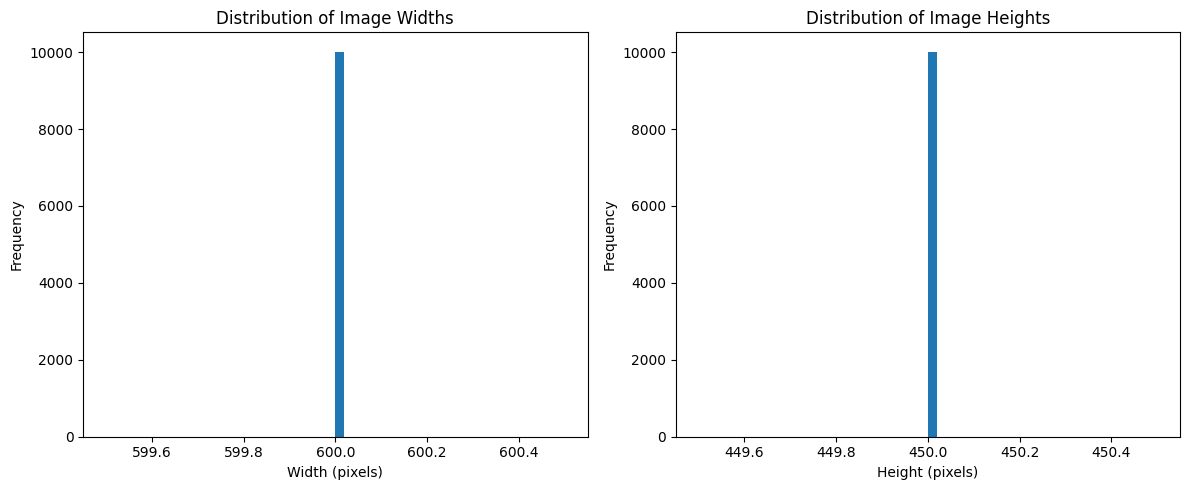

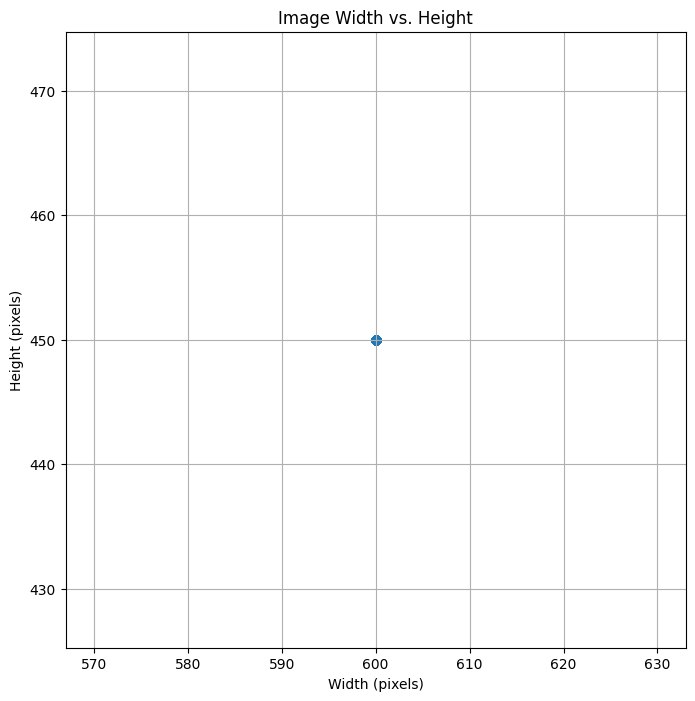

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(image_widths, bins=50)
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(image_heights, bins=50)
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(image_widths, image_heights, alpha=0.5)
plt.title('Image Width vs. Height')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True)
plt.show()

Tidak ada variasi dimensi image, semuanya 450x600

In [ ]:
dim = [0,0]
row = long_df.iloc[0]
image_filename = row['image']
image_path = os.path.join(base_folder, image_filename + '.jpg') # Assuming images have .jpg extension

try:
    img = Image.open(image_path)
    dim = img.size
    img.close()
except FileNotFoundError:
    print(f"Warning: Image file not found at {image_path}. Skipping.")
except Exception as e:
    print(f"Warning: Could not process image file {image_path}: {e}. Skipping.")

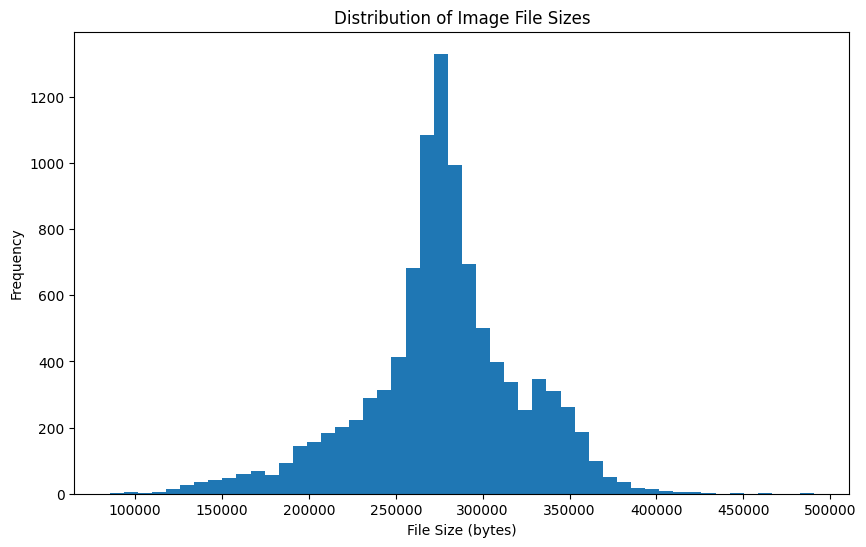

In [ ]:
image_sizes = []

for index, row in long_df.iterrows():
    image_filename = row['image']
    image_path = os.path.join(base_folder, image_filename + '.jpg')

    try:
        size = os.path.getsize(image_path)
        image_sizes.append(size)
    except FileNotFoundError:
        print(f"Warning: Image file not found at {image_path}. Skipping.")
    except Exception as e:
        print(f"Warning: Could not get size for image file {image_path}: {e}. Skipping.")

plt.figure(figsize=(10, 6))
plt.hist(image_sizes, bins=50)
plt.title('Distribution of Image File Sizes')
plt.xlabel('File Size (bytes)')
plt.ylabel('Frequency')
plt.show()

## Pixel Intensity Visualization

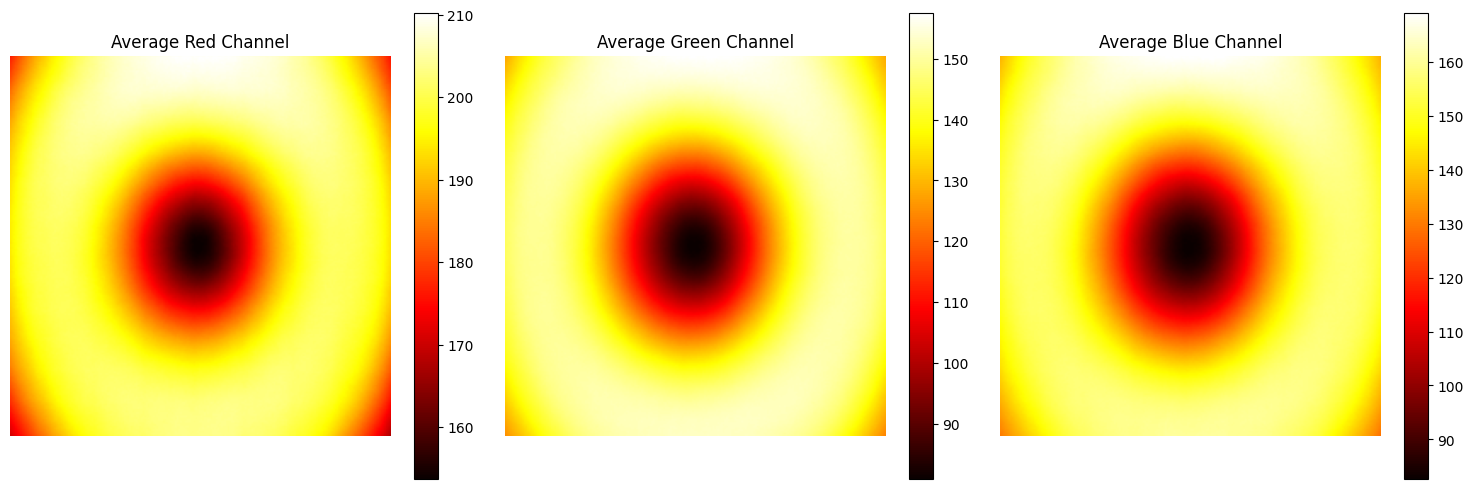

In [ ]:
sum_pixels_r = None
sum_pixels_g = None
sum_pixels_b = None
processed_image_count = 0

target_size = (224, 224)

for index, row in long_df.iterrows():
    image_filename = row['image']
    image_path = os.path.join(base_folder, image_filename + '.jpg')

    try:
        img = Image.open(image_path).convert('RGB')
        img_resized = img.resize(target_size)
        img_np = np.array(img_resized)

        if sum_pixels_r is None:
            sum_pixels_r = np.zeros(target_size)
            sum_pixels_g = np.zeros(target_size)
            sum_pixels_b = np.zeros(target_size)

        sum_pixels_r += img_np[:, :, 0]
        sum_pixels_g += img_np[:, :, 1]
        sum_pixels_b += img_np[:, :, 2]

        processed_image_count += 1
        img.close()
    except FileNotFoundError:
        print(f"Warning: Image file not found at {image_path}. Skipping.")
    except Exception as e:
if processed_image_count > 0:
    avg_pixels_r = sum_pixels_r / processed_image_count
    avg_pixels_g = sum_pixels_g / processed_image_count
    avg_pixels_b = sum_pixels_b / processed_image_count
else:
    avg_pixels_r = None
    avg_pixels_g = None
    avg_pixels_b = None
    print("No images were processed.")

# Create heatmap visualizations
if avg_pixels_r is not None:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    ax = axes[0]
    im = ax.imshow(avg_pixels_r, cmap='hot')
    ax.set_title('Average Red Channel')
    ax.axis('off')
    fig.colorbar(im, ax=ax)


    ax = axes[1]
    im = ax.imshow(avg_pixels_g, cmap='hot')
    ax.set_title('Average Green Channel')
    ax.axis('off')
    fig.colorbar(im, ax=ax)


    ax = axes[2]
    im = ax.imshow(avg_pixels_b, cmap='hot')
    ax.set_title('Average Blue Channel')
    ax.axis('off')
    fig.colorbar(im, ax=ax)

    plt.tight_layout()
    plt.show()

# Basic Dimensional Reduction

## UMAP Dimensionality Reduction



In [ ]:
n_samples_per_class = 75 # Reduced sample
sampled_df = long_df.groupby('label').apply(lambda x: x.sample(min(len(x), n_samples_per_class), random_state=42)).reset_index(drop=True)

images_list = []
labels_list = []
target_size = (450, 600) # Consistent size for preprocessing

for index, row in sampled_df.iterrows():
    image_filename = row['image']
    image_path = os.path.join(base_folder, image_filename + '.jpg')

    try:
        img = Image.open(image_path).convert('RGB')
        img_resized = img.resize(target_size)
        images_list.append(np.array(img_resized))
        labels_list.append(row['label'])
        img.close()
    except FileNotFoundError:
        print(f"Warning: Image file not found at {image_path}. Skipping.")
    except Exception as e:
        print(f"Warning: Could not process image file {image_path}: {e}. Skipping.")

images_np = np.array(images_list)
labels_np = np.array(labels_list)

print(f"Processed {len(images_np)} images for dimensionality reduction.")

/tmp/ipython-input-2842747940.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = long_df.groupby('label').apply(lambda x: x.sample(min(len(x), n_samples_per_class), random_state=42)).reset_index(drop=True)


Processed 525 images for dimensionality reduction.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load VGG16 model without the top (classification) layer
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Preprocess images for VGG16
images_preprocessed = preprocess_input(images_np)

# Get image embeddings
image_embeddings = model.predict(images_preprocessed)

print(f"Extracted features of shape: {image_embeddings.shape}")

import umap

reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = reducer.fit_transform(image_embeddings)

print(f"Reduced embeddings shape: {embeddings_2d.shape}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 1815s 106s/step
Extracted features of shape: (525, 512)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Reduced embeddings shape: (525, 2)


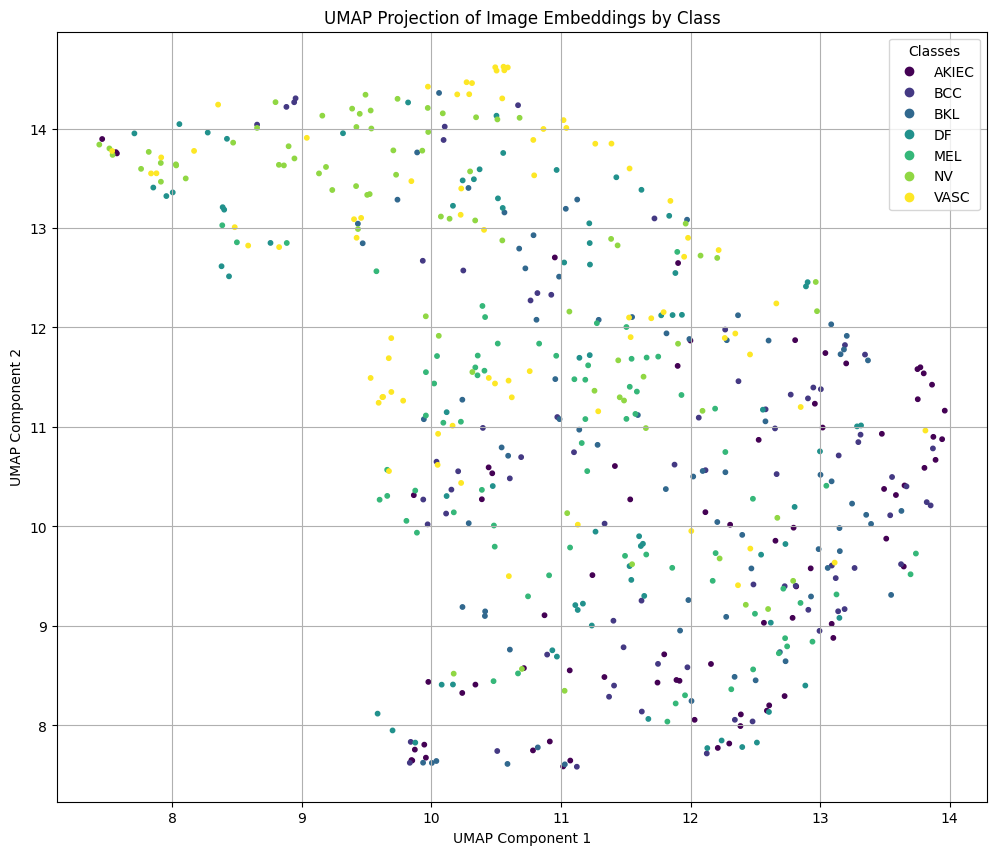

In [ ]:
plt.figure(figsize=(12, 10))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=pd.factorize(labels_np)[0], cmap='viridis', s=10)

legend = plt.legend(*scatter.legend_elements(), title="Classes")
for text, label in zip(legend.get_texts(), np.unique(labels_np)):
    text.set_text(label)

plt.title('UMAP Projection of Image Embeddings by Class')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)
plt.show()

## Logistic Regression from DR Data

In [ ]:
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa6666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666z6666666666666666z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6z6zz

In [ ]:
# Simple Classification with 2D UMAP Embeddings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Case n = 2
X_train, X_test, y_train, y_test = train_test_split(embeddings_2d, labels_np, test_size=0.2, random_state=42, stratify=labels_np)

classifier_2d = LogisticRegression(max_iter=1000)
classifier_2d.fit(X_train, y_train)

y_pred_2d = classifier_2d.predict(X_test)
print("Classification Report (2D UMAP Embeddings):")
print(classification_report(y_test, y_pred_2d))

# Case n = 100
reducer_100 = umap.UMAP(n_components=100, random_state=42)
embeddings_100d = reducer_100.fit_transform(image_embeddings)

X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(embeddings_100d, labels_np, test_size=0.2, random_state=42, stratify=labels_np)

classifier_100d = LogisticRegression(max_iter=1000)
classifier_100d.fit(X_train_100, y_train_100)

y_pred_100d = classifier_100d.predict(X_test_100)
print("\nClassification Report (100D UMAP Embeddings):")
print(classification_report(y_test_100, y_pred_100d))

Classification Report (2D UMAP Embeddings):
              precision    recall  f1-score   support

       AKIEC       0.31      0.53      0.39        15
         BCC       0.31      0.27      0.29        15
         BKL       0.00      0.00      0.00        15
          DF       0.06      0.07      0.06        15
         MEL       0.29      0.13      0.18        15
          NV       0.32      0.53      0.40        15
        VASC       0.25      0.20      0.22        15

    accuracy                           0.25       105
   macro avg       0.22      0.25      0.22       105
weighted avg       0.22      0.25      0.22       105



/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



Classification Report (100D UMAP Embeddings):
              precision    recall  f1-score   support

       AKIEC       0.50      0.53      0.52        15
         BCC       0.27      0.20      0.23        15
         BKL       0.14      0.07      0.09        15
          DF       0.60      0.20      0.30        15
         MEL       0.33      0.67      0.44        15
          NV       0.18      0.27      0.22        15
        VASC       0.43      0.40      0.41        15

    accuracy                           0.33       105
   macro avg       0.35      0.33      0.32       105
weighted avg       0.35      0.33      0.32       105



# Kesimpulan

### Data Analysis Key Findings

*   **Class Distribution:** The dataset exhibits a significant class imbalance.
*   **Image Dimensions:** The majority of images have similar width and height, suggesting a consistent aspect ratio, likely due to resizing during data collection or preprocessing.
*   **Image File Sizes:** The distribution of image file sizes shows variability, but a significant portion of images fall within a certain size range.
*   **Pixel Intensity:** The average pixel intensity is highest in the Red channel (194.70), followed by the Blue (145.49) and Green (139.26) channels. The standard deviations for all channels are similar (around 21-25), indicating a comparable level of variation in intensity across the dataset for each color.
*   **Average Image:** The heatmaps of average pixel intensity per channel reveal general color characteristics and intensity distribution across the dataset, with higher average intensities in the red channel.
*   **Image Embeddings:** The UMAP projection of image embeddings shows some degree of clustering for certain skin lesion classes in 2D space, while others exhibit significant overlap, indicating potential challenges in classifying all classes based solely on these features.

### Insights or Next Steps

*   The significant class imbalance should be addressed during model training using techniques like oversampling, undersampling, or weighted loss functions to prevent bias towards the majority class.
*   Further investigation into the clusters and overlaps observed in the UMAP projection could provide insights into the discriminative power of the extracted features and guide the selection of more robust feature extraction methods or model architectures.


label
NV       6705
MEL      1113
BKL      1099
BCC       514
AKIEC     327
VASC      142
DF        115
Name: count, dtype: int64


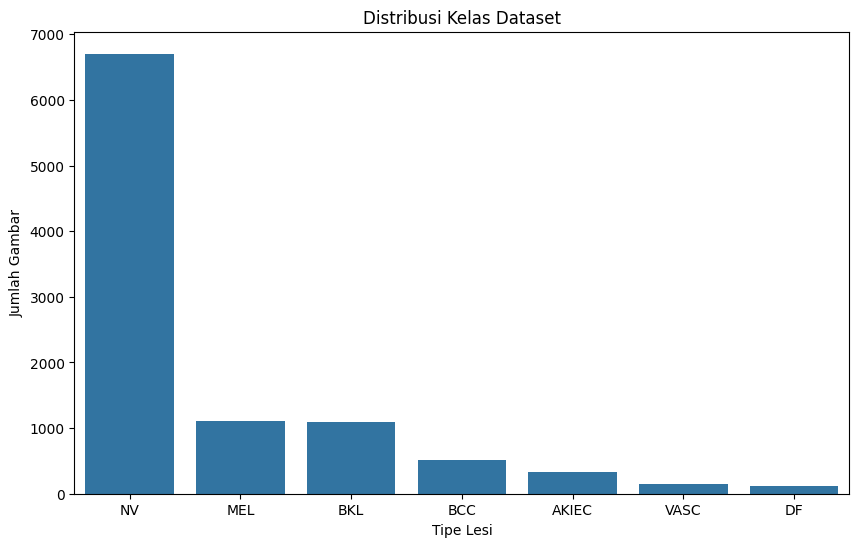

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Muat file ground truth Anda
# Ganti 'ground_truth_file.csv' dengan nama file Anda

# 1. Dapatkan Statistik (counts)
label_counts = df['label'].value_counts()
print(label_counts)

# 2. Buat Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribusi Kelas Dataset')
plt.ylabel('Jumlah Gambar')
plt.xlabel('Tipe Lesi')
plt.show()

In [5]:
df

image label
0      ISIC_0024310   MEL
1      ISIC_0024313   MEL
2      ISIC_0024315   MEL
3      ISIC_0024323   MEL
4      ISIC_0024333   MEL
...             ...   ...
10010  ISIC_0033844  VASC
10011  ISIC_0033969  VASC
10012  ISIC_0033991  VASC
10013  ISIC_0034196  VASC
10014  ISIC_0034214  VASC

[10015 rows x 2 columns]

In [6]:
import random
from tqdm import tqdm
SAMPLE_SIZE = 1000

DATASET_DIR = "/data/wilsontansil/seeing-is-believing/notebooks/ISIC2018_Task3_Training_Input"
FILE_EXTENSION = ".jpg"

image_filenames = df['image'].tolist()

if len(image_filenames) > SAMPLE_SIZE:
    image_sample = random.sample(image_filenames, SAMPLE_SIZE)
else:
    image_sample = image_filenames

In [7]:
from PIL import Image

image_sizes = []
image_modes = []
for img_name in tqdm(image_sample):
    img_path = os.path.join(DATASET_DIR, f"{img_name}{FILE_EXTENSION}")

    try:
        with Image.open(img_path) as img:
            image_sizes.append(img.size)
            image_modes.append(img.mode)
    except FileNotFoundError:
        print(f"File not found : {img_path}")
    except Exception as e:
        print(F"Error - {img_path}: {e}")

100%|██████████| 1000/1000 [00:00<00:00, 18227.47it/s]


In [8]:
from collections import Counter

print("\n--- Statistik Dimensi Gambar (Ukuran) ---")
size_counts = Counter(image_sizes)
print(f"Ditemukan {len(size_counts)} ukuran gambar yang unik dari {len(image_sample)} sampel.")
print("5 Ukuran paling umum:")
for size, count in size_counts.most_common(5):
    print(f"  {size}: {count} gambar")


--- Statistik Dimensi Gambar (Ukuran) ---
Ditemukan 1 ukuran gambar yang unik dari 1000 sampel.
5 Ukuran paling umum:
  (600, 450): 1000 gambar


In [9]:
print("\n--- Statistik Mode Warna (Channels) ---")
mode_counts = Counter(image_modes)
for mode, count in mode_counts.items():
    print(f"  Mode '{mode}': {count} gambar")


--- Statistik Mode Warna (Channels) ---
  Mode 'RGB': 1000 gambar


In [10]:
print("\n--- Statistik Intensitas Piksel ---")
print("  Secara default, gambar (seperti JPEG/PNG) memiliki rentang piksel [0, 255].")
print("  Ini memvalidasi langkah normalisasi '/ 255.0' untuk mengubah rentang menjadi [0.0, 1.0].")


--- Statistik Intensitas Piksel ---
  Secara default, gambar (seperti JPEG/PNG) memiliki rentang piksel [0, 255].
  Ini memvalidasi langkah normalisasi '/ 255.0' untuk mengubah rentang menjadi [0.0, 1.0].
